# N-grams Representation

The **N-grams** model is a technique used in natural language processing to capture sequences of words. Unlike the Bag of Words model, which treats words as individual entities, the N-grams approach allows us to consider word sequences, making it possible to capture more context and structure in text data. This technique is useful for applications such as text generation, sentiment analysis, and speech recognition.

##### What are N-grams?

An **N-gram** is a contiguous sequence of `N` items (usually words) from a given text. The value of `N` can vary, and it determines how many words are considered together. For example:

- **Unigram** (`N=1`): Individual words. Example: "The", "cat", "sat".
- **Bigram** (`N=2`): Pairs of words. Example: "The cat", "cat sat".
- **Trigram** (`N=3`): Triplets of words. Example: "The cat sat", "cat sat on".

Using N-grams allows us to incorporate more context by taking into account the sequence of words, which can significantly improve the understanding of language structure.

##### How N-grams Work

1. **Generate Sequences**: N-grams are generated by sliding a window of size `N` over the text to capture contiguous word sequences.
2. **Frequency Count**: After generating the N-grams, a frequency count can be used to identify how often each N-gram occurs in the dataset. This is helpful for capturing common phrases or understanding context.

Consider the sentence:

- "Machine learning is a fascinating field."

- **Bigrams**: "Machine learning", "learning is", "is a", "a fascinating", "fascinating field"
- **Trigrams**: "Machine learning is", "learning is a", "is a fascinating", "a fascinating field"

##### Advantages and Limitations of N-grams

**Advantages**:
- **Context Awareness**: N-grams capture word sequences, allowing us to preserve context that is lost in simpler models like Bag of Words.
- **Better Language Modeling**: N-grams are used to build language models, which helps in predicting the next word or in text generation tasks.

**Limitations**:
- **Data Sparsity**: As `N` increases, the number of possible N-grams grows exponentially, leading to sparsity and requiring more data.
- **Limited Long-Range Dependencies**: Even though N-grams capture sequences, longer-range dependencies may still be missed if `N` is not large enough.


### 1. Example of N-grams

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

# Set the stopwords
stop_words = set(stopwords.words('english'))

# Sample documents
documents = [
    "Machine learning is a fascinating field.",
    "Data science and machine learning are closely related.",
    "Deep learning is a subfield of machine learning.",
    "Supervised learning involves labeled data.",
    "Unsupervised learning deals with unlabeled data.",
    "Feature engineering is crucial for model performance.",
    "Data preprocessing is an important step in machine learning.",
    "Natural language processing is a key area in AI.",
    "Hyperparameter tuning helps to optimize models.",
    "Model evaluation is necessary for understanding model accuracy.",
    "Machine learning algorithms improve with more data.",
    "Clustering is a common unsupervised learning technique.",
    "Regression models predict continuous outputs.",
    "Classification models help distinguish between different categories.",
    "Decision trees are simple yet powerful machine learning models.",
    "Random forests improve decision tree performance by using ensembles.",
    "Support vector machines are effective in high-dimensional spaces.",
    "Neural networks are inspired by the human brain's structure.",
    "Convolutional neural networks are used in image recognition.",
    "Recurrent neural networks handle sequential data like text or time series.",
    "Principal component analysis reduces dimensionality in datasets.",
    "Cross-validation ensures robust model performance evaluation.",
    "Overfitting occurs when a model performs well on training data but poorly on unseen data.",
    "Underfitting happens when a model is too simple to capture the data's patterns.",
    "Reinforcement learning uses rewards to train agents for decision-making tasks.",
    "Transfer learning allows models to leverage knowledge from one task for another.",
    "Gradient descent is a fundamental optimization algorithm in machine learning.",
    "Bias and variance are key factors in model performance.",
    "Feature selection helps reduce noise and improve interpretability.",
    "Ethical considerations in AI are critical for responsible machine learning applications."
]

# Initialize the CountVectorizer with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the documents to create the bigram representation
ngram_matrix = vectorizer.fit_transform(documents)

# Convert the N-gram matrix to an array and print the vocabulary
print("Vocabulary:", vectorizer.get_feature_names_out())
print("N-gram Representation:\n", ngram_matrix.toarray())

Vocabulary: ['agents for' 'ai are' 'algorithm in' 'algorithms improve' 'allows models'
 'an important' 'analysis reduces' 'and improve' 'and machine'
 'and variance' 'are closely' 'are critical' 'are effective'
 'are inspired' 'are key' 'are simple' 'are used' 'area in'
 'between different' 'bias and' 'brain structure' 'but poorly' 'by the'
 'by using' 'capture the' 'classification models' 'closely related'
 'clustering is' 'common unsupervised' 'component analysis'
 'considerations in' 'continuous outputs' 'convolutional neural'
 'critical for' 'cross validation' 'crucial for' 'data but' 'data like'
 'data patterns' 'data preprocessing' 'data science' 'deals with'
 'decision making' 'decision tree' 'decision trees' 'deep learning'
 'descent is' 'different categories' 'dimensional spaces'
 'dimensionality in' 'distinguish between' 'effective in' 'engineering is'
 'ensures robust' 'ethical considerations' 'evaluation is' 'factors in'
 'fascinating field' 'feature engineering' 'feature s

### 2. Understanding the N-gram Result

The output you provided is the **vocabulary** generated by the N-gram model for bigrams (pairs of words). Here's how to interpret it and find meaning:

1. **Vocabulary List**: This list contains all the bigrams (two-word sequences) identified across your text corpus. For example:
   - `"machine learning"` represents the occurrence of the sequence "machine learning" in the documents.
   - `"data science"` and `"deep learning"` are other examples of pairs of words that frequently co-occur.

2. **Understanding the Result**:
   - The vocabulary tells you which combinations of two words are present in the dataset.
   - You can use this information to understand common phrases, such as "machine learning", "data science", and "deep learning". These phrases are often more meaningful than individual words because they preserve some context, giving you insight into what combinations of words are important in your dataset.

3. **Usage and Visualization**:
   - To find meaning, you can look at the **frequency** of each bigram. This helps you understand which word pairs are most common in your dataset, giving you insight into the prevalent themes or ideas.
   - You can visualize the frequencies using bar plots or word clouds to see the most prominent word pairs. In the example code provided in the notebook, the bigram frequencies are calculated and sorted, then visualized using a bar plot to help identify which phrases are most frequent.

By analyzing and visualizing these N-grams, you can understand common word associations in your text data, which is especially useful for tasks like **text summarization**, **keyword extraction**, and **building predictive language models**.


### 3. Visualizing the N-grams Frequency

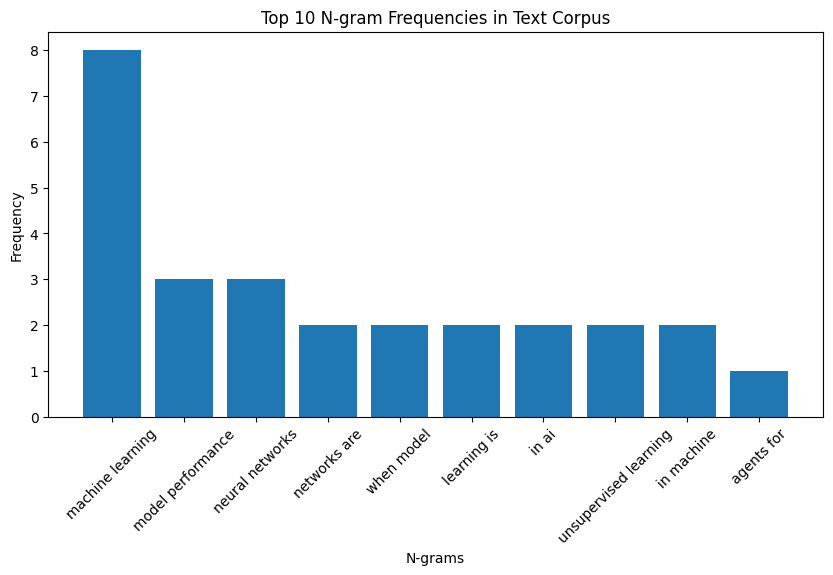

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Get the vocabulary and N-gram frequencies
vocabulary = vectorizer.get_feature_names_out()
frequencies = np.array(ngram_matrix.sum(axis=0)).flatten()

# Sort the vocabulary and frequencies by frequency in descending order
sorted_indices = np.argsort(-frequencies)
sorted_vocabulary = vocabulary[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

# Select the top 10 N-grams
top_n = 10
sorted_vocabulary = sorted_vocabulary[:top_n]
sorted_frequencies = sorted_frequencies[:top_n]

# Plot the N-gram frequencies
plt.figure(figsize=(10, 5))
plt.bar(sorted_vocabulary, sorted_frequencies)
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title('Top 10 N-gram Frequencies in Text Corpus')
plt.xticks(rotation=45)
plt.show()

In [97]:
# Select the top 10 N-grams
top_n = 25
top_vocabulary = sorted_vocabulary[:top_n]
top_frequencies = sorted_frequencies[:top_n]

# Create a textual list with the top N-grams
top_ngrams = list(zip(top_vocabulary, top_frequencies))

# Print the top N-grams for later usage
print("Top N-grams with Frequencies:")
for ngram, freq in top_ngrams:
    print(f"{ngram}: {freq}")

Top N-grams with Frequencies:
machine learning: 8
model performance: 3
neural networks: 3
networks are: 2
when model: 2
learning is: 2
in ai: 2
unsupervised learning: 2
in machine: 2
agents for: 1


### 4. Visualizing N-grams Word Cloud

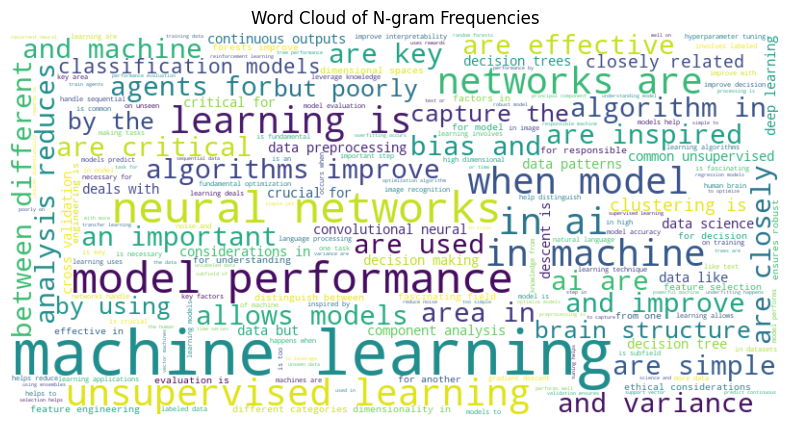

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Get the vocabulary and N-gram frequencies
vocabulary = vectorizer.get_feature_names_out()
frequencies = np.array(ngram_matrix.sum(axis=0)).flatten()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vocabulary, frequencies)))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of N-gram Frequencies')
plt.show()

### 5. Converting N-grams into Single Tokens for Further Analysis
What errors do we see in the output?

In [99]:
# Define common N-grams to be treated as single tokens
common_ngrams = ["machine learning", "data science", "deep learning", "supervised learning", "unsupervised learning", "unlabeled data"]

# Replace common N-grams with a single token representation
for i in range(len(documents)):
    for ngram in common_ngrams:
        documents[i] = re.sub(ngram, ngram.replace(" ", "_"), documents[i])

# Print the updated documents
for doc in documents:
    print(doc)

Machine learning is a fascinating field.
Data science and machine_learning are closely related.
Deep learning is a subfield of machine_learning.
Supervised learning involves labeled data.
Unsupervised_learning deals with unlabeled_data.
Feature engineering is crucial for model performance.
Data preprocessing is an important step in machine_learning.
Natural language processing is a key area in AI.
Hyperparameter tuning helps to optimize models.
Model evaluation is necessary for understanding model accuracy.
Machine learning algorithms improve with more data.
Clustering is a common unsupervised_learning technique.
Regression models predict continuous outputs.
Classification models help distinguish between different categories.
Decision trees are simple yet powerful machine_learning models.
Random forests improve decision tree performance by using ensembles.
Support vector machines are effective in high-dimensional spaces.
Neural networks are inspired by the human brain's structure.
Conv

### 6. Working with a Dataframe

##### 6.1 Load the data

In [100]:
import pandas as pd

# Load the data
df = pd.read_csv('movies_cleaned.csv')

##### 6.2 Create Bi-grams

In [123]:
# Initialize the CountVectorizer with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))


# Fit and transform the 'Plot' column to create the bigram representation
ngram_matrix = vectorizer.fit_transform(df['Cleaned_text'])

# Convert the N-gram matrix to a DataFrame
df_ngram = pd.DataFrame(ngram_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

# Print the vocabulary and N-gram representation
print("Vocabulary:", vectorizer.get_feature_names_out())
print("\nN-gram Representation DataFrame:")


Vocabulary: ['_stakeout_ time' 'aaliyah haughton' 'aaliyah plays' ... 'zooming rough'
 'ángela examination' 'über fame']

N-gram Representation DataFrame:


##### 6.3 Visualize Frequency

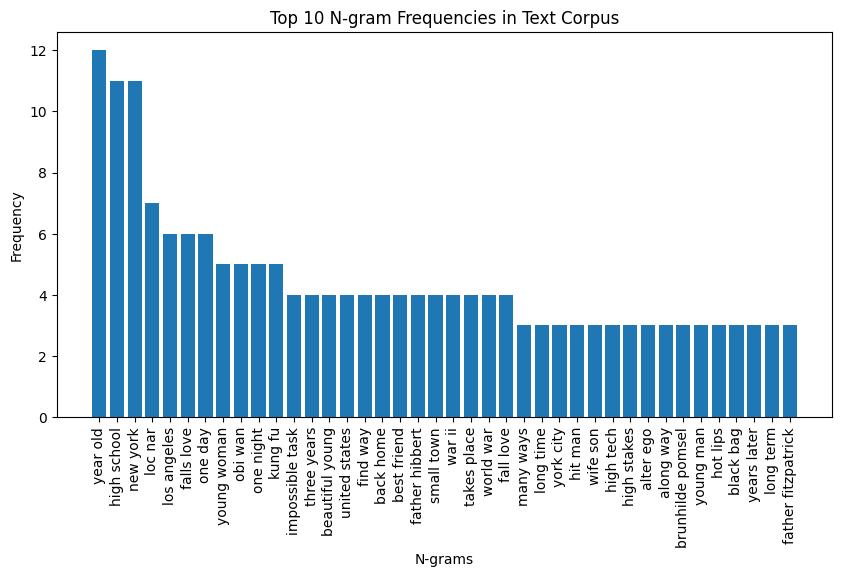

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Get the vocabulary and N-gram frequencies
vocabulary = vectorizer.get_feature_names_out()
frequencies = np.array(ngram_matrix.sum(axis=0)).flatten()

# Sort the vocabulary and frequencies by frequency in descending order
sorted_indices = np.argsort(-frequencies)
sorted_vocabulary = vocabulary[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

# Select the top 10 N-grams
top_n = 40
sorted_vocabulary = sorted_vocabulary[:top_n]
sorted_frequencies = sorted_frequencies[:top_n]

# Plot the N-gram frequencies
plt.figure(figsize=(10, 5))
plt.bar(sorted_vocabulary, sorted_frequencies)
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title('Top 10 N-gram Frequencies in Text Corpus')
plt.xticks(rotation=90)
plt.show()

##### 6.4 Visualize Word Cloud

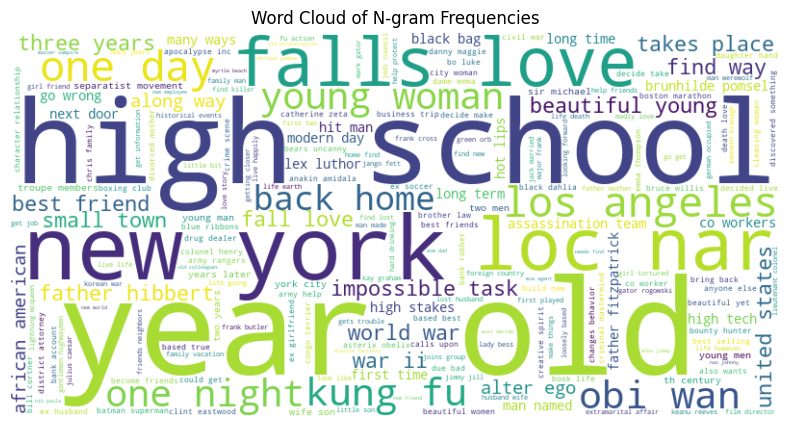

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Get the vocabulary and N-gram frequencies
vocabulary = vectorizer.get_feature_names_out()
frequencies = np.array(ngram_matrix.sum(axis=0)).flatten()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vocabulary, frequencies)))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of N-gram Frequencies')
plt.show()

##### 6.5 Convert into Single Tokens

In [ ]:
import re

# Define common N-grams to be treated as single tokens
common_ngrams = [""]

# Replace common N-grams with a single token representation
for i in range(len(documents)):
    for ngram in common_ngrams:
        documents[i] = re.sub(ngram, ngram.replace(" ", "_"), documents[i])

# Print the updated documents
for doc in documents:
    print(doc)

##### 6.6 (Optional) Save the new Dataframe

In [ ]:
# Code goes here

### 7. Translate to the Case
Go to the case and perform Bi-grams on the news articles.